In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #for plots
import pandas_profiling as pp
import matplotlib.pyplot as plt
#from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
%reload_ext autoreload
%autoreload 2
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
train_data=pd.read_csv('titanic/train.csv')
train_data.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [7]:
test_data=pd.read_csv('titanic/test.csv')
test_data.head(2)

PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S

In [4]:
test_data.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

In [9]:
train_data.shape

(891, 12)

In [10]:
train_data.Survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [7]:
pp.ProfileReport(train_data)

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [8]:
pp.ProfileReport(test_data)

In [11]:
#changing column names to lower cases
train_data.columns= train_data.columns.str.lower()
train_data.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [10]:
test_data.columns = test_data.columns.str.lower()
test_data.columns

Index(['passengerid', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [11]:
train_data.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [12]:
train_data.age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

In [13]:
train_data[train_data.age <=1]['age']

78     0.83
164    1.00
172    1.00
183    1.00
305    0.92
381    1.00
386    1.00
469    0.75
644    0.75
755    0.67
788    1.00
803    0.42
827    1.00
831    0.83
Name: age, dtype: float64

# Filling Missing Values

In [14]:
#Fill Nan values in age and embarked in train data.
train_data.age.fillna(train_data.age.mean(), inplace=True)
train_data.embarked.fillna("S", inplace=True)
train_data.fare.fillna(train_data.fare.mean(), inplace=True)


In [15]:
#Fill Nan values in test data
test_data.age.fillna(test_data.age.mean(), inplace=True)
test_data.embarked.fillna("S", inplace=True)
test_data.fare.fillna(test_data.fare.mean(), inplace=True)


In [16]:
train_data.isnull().sum()
#Leave Cabin for now. We dont need it. But if you want you can fill 
#cabin as i am not using it so not changing the data

passengerid      0
survived         0
pclass           0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         0
dtype: int64

**Change of data type of age to int64**

In [17]:
train_data.age= train_data.age.astype(int)

In [18]:
train_data['age'].dtype


dtype('int64')

In [19]:
test_data.age= test_data.age.astype(int)

In [20]:
test_data.age.dtype

dtype('int64')

# Data Visualization 

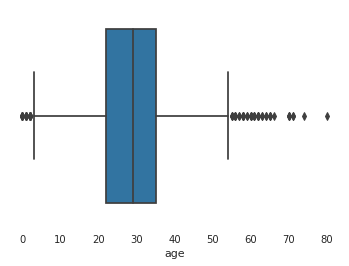

In [21]:

sns.boxplot(train_data.age)
plt.show()
#we can see very few people over 65 were travelling


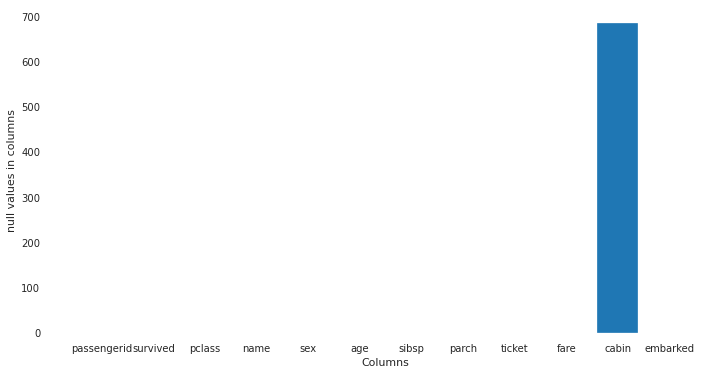

In [22]:
plt.figure(figsize = (12,6))
plt.bar(train_data.columns, train_data.isnull().sum())
plt.xlabel("Columns")
plt.ylabel("null values in columns")
plt.show()
#null values find in 'age', 'cabin','embarked'

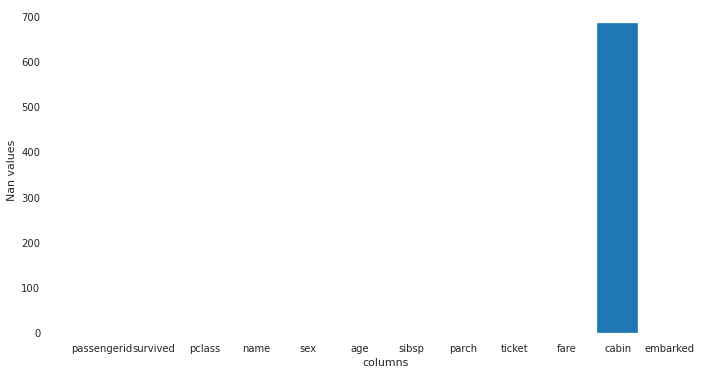

In [23]:
plt.figure(figsize =(12,6))
plt.bar(train_data.columns, train_data.isna().sum())
plt.xlabel("columns")
plt.ylabel("Nan values")
plt.show()

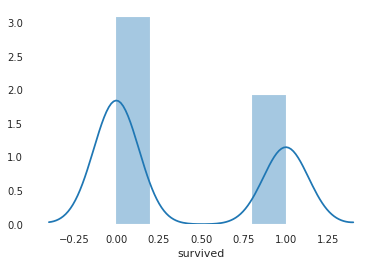

In [24]:
#number of survived 
sns.distplot(train_data.survived)
#survival rate is less than the dead

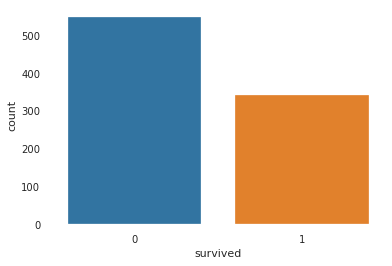

In [25]:
#let's find out how many survived visually
sns.countplot('survived', data=train_data)
#survived = almost 300 , not survived = almost = 600

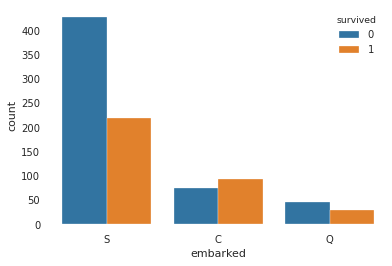

In [26]:
sns.countplot(train_data.embarked, hue = train_data.survived)
#we can see below that 'S ' class has high death rate.

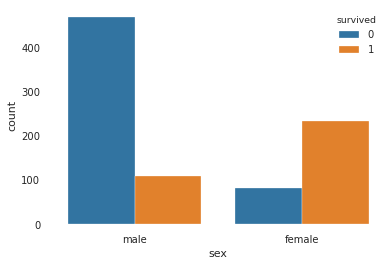

In [27]:
sns.countplot(train_data.sex, hue= train_data.survived)
#male death rate is higher than female

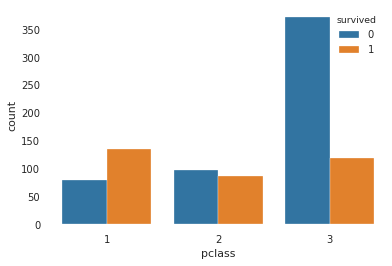

In [28]:
sns.countplot(train_data.pclass, hue= train_data.survived)
#Pclass 3 has far more death rate

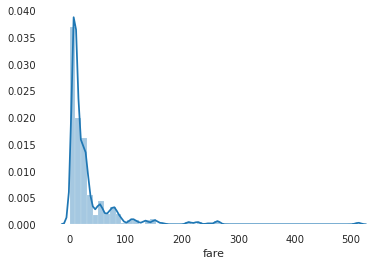

In [29]:
sns.distplot(train_data.fare)
#People mostly paid less than 100

In [30]:
train_data.columns


Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [31]:
#Look at all the values in each column and get count

for val in train_data:
    print (train_data[val].value_counts())
    print()
    
#observations:
#1. male > female 
#2. survival rate < death

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: passengerid, Length: 891, dtype: int64

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

Kenyon, Mrs. Frederick R (Marion)    1
Lahoud, Mr. Sarkis                   1
Madill, Miss. Georgette Alexandra    1
Balkic, Mr. Cerin                    1
Fleming, Miss. Margaret              1
                                    ..
van Melkebeke, Mr. Philemon          1
Mockler, Miss. Helen Mary "Ellie"    1
Taussig, Miss. Ruth                  1
Taussig, Mr. Emil                    1
Woolner, Mr. Hugh                    1
Name: name, Length: 891, dtype: int64

male      577
female    314
Name: sex, dtype: int64

29    197
24     31
22     27
30     27
28     27
     ... 
74      1
66      1
12      1
53      1
80      1
Name: age, Length: 71, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: i

In [32]:
train_data= train_data.drop(['name','ticket'], axis=1)
train_data =train_data.dropna(subset=['cabin'])



In [33]:
# train_data.dtypes
# #look for data types of columns . we need to change object data type.

In [34]:
#Label encoder will transfer object data type to integer

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# Encode the sex column
train_data.iloc[:,3]=labelencoder.fit_transform(train_data.iloc[:,3].values)

#Encode the embarked column
train_data.iloc[:,9]=labelencoder.fit_transform(train_data.iloc[:,9].values)

#Encode the cabin column
train_data.iloc[:,8]=labelencoder.fit_transform(train_data.iloc[:,8].values)


In [35]:
#Check the unique values in sex and embarked

print(train_data.sex.unique())
print(train_data.embarked.unique())
print(train_data.cabin.unique())

[0 1]
[0 2 1]
[ 81  55 129 145  49 111  13  63  41 101  23  71  21  80 142 140 122  12
  91  98  52  36 116 138 107  45 141  61 123  18  14  69 144   9  28  43
   8 103  93  87  78 102  83  40 134  46  57  89  54 113   3  31  90  62
  51  74 125  72  35  76 124  65  17  56  85 127 146  59 104  24 131  79
  47 115 128  10  50  53  86 126  97 117 133   1  25  64  96  42 121 106
  39  88  26  27  20  82  77   2  48  75   0 135  29   4  95 110 114   5
  33   7 108 132  58  38  34 109  32  19 139  73 120  84  66 137  15 105
  67 100 118  92 136 143  22 112  44  94  11  16  37 130  68  99 119   6
  70  30  60]


In [36]:

fr_train_data = train_data.drop(columns = ['passengerid','cabin','embarked', 'sex'])
fr_test_data = test_data.drop(columns = ['passengerid', 'name','cabin','ticket','embarked', 'sex'])
# we will leave out survived column because it is y


In [37]:
fr_train_data.columns


Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [38]:
fr_test_data.columns


Index(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [39]:
# Dataset Preparation
x_train = fr_train_data.drop(columns=['survived'])
y_train = fr_train_data['survived']

In [40]:
#Create training sets as 80% training 20 % testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.20,random_state=0)

In [41]:
# #Scale the data by using standard scaler
# from sklearn.preprocessing import StandardScaler
# sc= StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.fit_transform(x_test)

In [42]:
#Create Random Forest Model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion ='entropy', random_state=0)
forest.fit(x_train,y_train)
y_pred = forest.predict(x_test)

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
fr_conf_matrix= confusion_matrix(y_test,y_pred)
print(fr_conf_matrix)

[[ 6  8]
 [ 4 23]]


In [44]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score
#Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score( y_test,y_pred))
model_accuracy = ((accuracy_score(y_test, y_pred).round(4))*100).round(1)

print('Accuracy: ' + str(model_accuracy))


Accuracy: 70.7


In [45]:
y_test_pred =forest.predict(fr_test_data)
survived_columns = pd.Series(y_test_pred, name = 'Survived')
result = pd.DataFrame()
result['PassengerId'] = test_data.passengerid
result['survived'] = survived_columns

result.to_csv('submission.csv', index=False)
print(result.head(10))

   PassengerId  survived
0          892         0
1          893         0
2          894         0
3          895         1
4          896         1
5          897         1
6          898         0
7          899         1
8          900         0
9          901         1


In [46]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
my_survival = [[3,2,21,0,0]]
my_survival_scaled= sc.fit_transform(my_survival)
pred = forest.predict(my_survival_scaled)
print(pred)
if pred == 0:
    print ("Unfortunately, the person doesnot survived")
else:
    print ("The person survived")

[1]
The person survived


In [47]:
# submission = pd.DataFrame({'PassengerId': test_data['passengerid'].values, 'Survived': y_train.astype(np.int32)})
# submission.head(10)

new_df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
new_df

Actual  Predicted
96        0          0
230       1          1
174       0          0
193       1          1
487       0          0
394       1          1
21        1          1
544       0          1
61        1          1
689       1          1
298       1          1
809       1          1
724       1          1
710       1          1
698       0          1
27        0          1
572       1          1
581       1          1
332       0          1
309       1          0
224       1          1
647       1          0
303       1          1
591       1          1
370       1          1
627       1          0
815       0          0
782       0          1
711       0          0
438       0          1
889       1          1
297       0          1
88        1          1
331       0          0
341       1          1
118       0          1
325       1          1
445       1          1
11        1          0
712       1          1
550       1          1

# Observations
1. Accuracy by using Random Forest classifier = 70%
2. survival was less than deaths
3. survival was almost 300 where as deaths were almost 600
4. Embarked ='S' has high death rate
5. female death rate is less than male
6. Pclass = 3 has far more death rate than other passenger classes